# Titanic Survival Prediction - Análisis Exploratorio de Datos
# ================================================================

# ## 📋 Objetivo
# Realizar un análisis exploratorio completo del dataset del Titanic para:
# - Entender la estructura y calidad de los datos
# - Identificar patrones de supervivencia
# - Detectar valores faltantes y outliers
# - Generar insights para el storytelling

In [10]:
# ## 1. Importación de Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings


In [11]:
import os
import sys

path = os.path.abspath("")
ruta_proyecto = os.path.abspath(os.path.join(path, ".."))
sys.path.append(os.path.join(ruta_proyecto, ""))

from src.utils.helpers import save_current_plot

# 1. Configuración

In [12]:
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Configuración de visualizaciones
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga y Primera Inspección de Datos

In [13]:
# Cargar el dataset
df = pd.read_csv("../data/raw/titanic.csv")

print("🚢 DATASET DEL TITANIC - PRIMERA INSPECCIÓN")
print("=" * 50)
print(f"📊 Dimensiones del dataset: {df.shape}")
print(f"👥 Total de pasajeros: {len(df)}")
print(f"📈 Total de características: {len(df.columns)}")

🚢 DATASET DEL TITANIC - PRIMERA INSPECCIÓN
📊 Dimensiones del dataset: (891, 12)
👥 Total de pasajeros: 891
📈 Total de características: 12


## 3. Información General del Dataset

In [14]:
print("\n📋 INFORMACIÓN GENERAL")
print("=" * 30)
print(df.info())

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 30)
print(df.describe())

print("\n🔍 PRIMERAS 5 FILAS")
print("=" * 20)
print(df.head())


📋 INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 ESTADÍSTICAS DESCRIPTIVAS
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29

## 4. Análisis de Valores Faltantes


❌ ANÁLISIS DE VALORES FALTANTES
        Columna  Valores Faltantes  Porcentaje (%)
10        Cabin                687       77.104377
5           Age                177       19.865320
11     Embarked                  2        0.224467
0   PassengerId                  0        0.000000
3          Name                  0        0.000000
2        Pclass                  0        0.000000
1      Survived                  0        0.000000
4           Sex                  0        0.000000
7         Parch                  0        0.000000
6         SibSp                  0        0.000000
9          Fare                  0        0.000000
8        Ticket                  0        0.000000
✅ Gráfico guardado: ../results/figures/eda_plots\4-Valores Faltantes.png


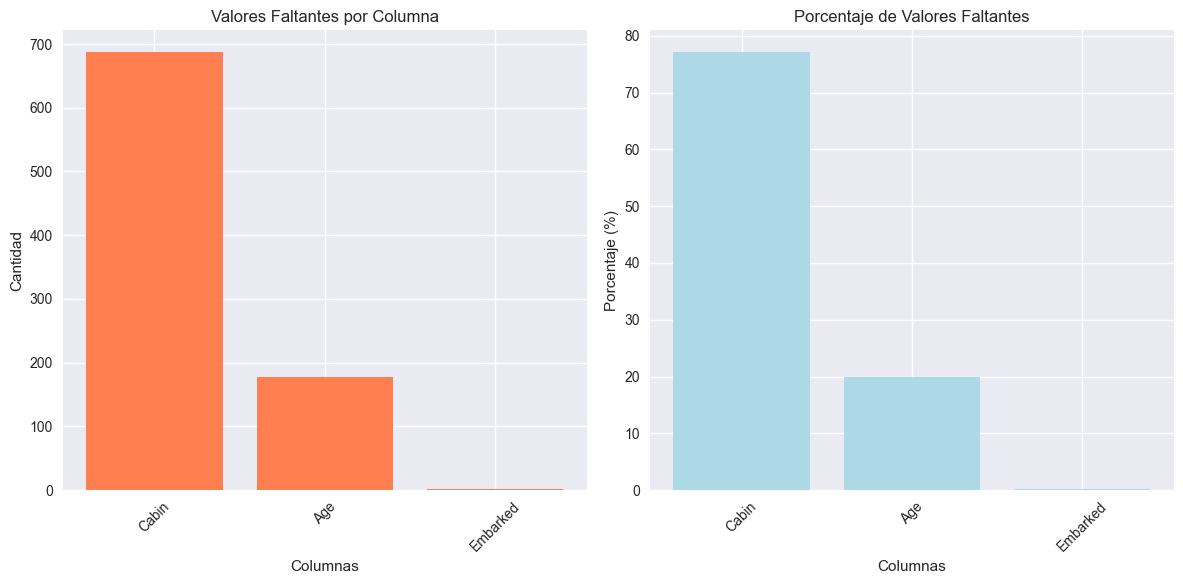

In [16]:
print("\n❌ ANÁLISIS DE VALORES FALTANTES")
print("=" * 35)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame(
    {
        "Columna": missing_data.index,
        "Valores Faltantes": missing_data.values,
        "Porcentaje (%)": missing_percent.values,
    }
).sort_values("Valores Faltantes", ascending=False)

print(missing_df)

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_df_filtered = missing_df[missing_df["Valores Faltantes"] > 0]
plt.bar(
    missing_df_filtered["Columna"],
    missing_df_filtered["Valores Faltantes"],
    color="coral",
)
plt.title("Valores Faltantes por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(
    missing_df_filtered["Columna"],
    missing_df_filtered["Porcentaje (%)"],
    color="lightblue",
)
plt.title("Porcentaje de Valores Faltantes")
plt.xlabel("Columnas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)

plt.tight_layout()
save_current_plot("4-Valores Faltantes", "../results/figures/eda_plots")
plt.show()

## 5. Análisis de la Variable Objetivo (Survived)


🎯 ANÁLISIS DE SUPERVIVENCIA
👥 Total de pasajeros: 891
💀 Fallecidos: 549 (61.6%)
✅ Supervivientes: 342 (38.4%)
📊 Tasa de supervivencia: 0.384 (38.4%)
✅ Gráfico guardado: ../results/figures/eda_plots\5-Variable Objetivo.png


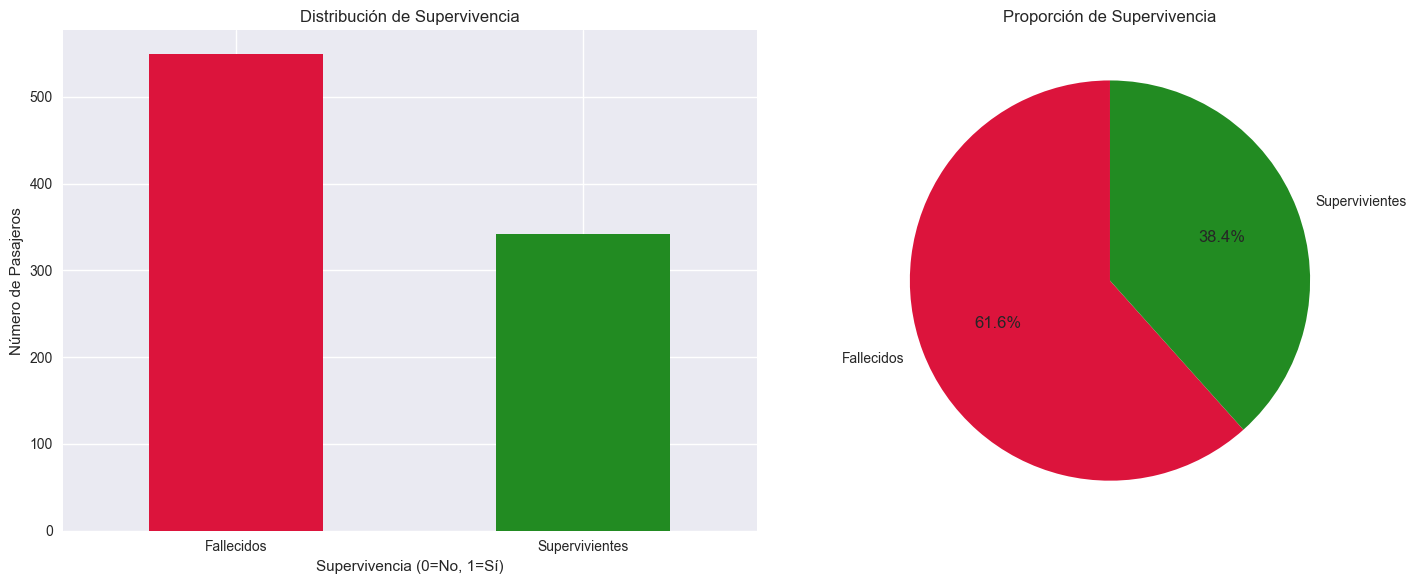

In [17]:
print("\n🎯 ANÁLISIS DE SUPERVIVENCIA")
print("=" * 30)

survival_counts = df["Survived"].value_counts()
survival_rate = df["Survived"].mean()

print(f"👥 Total de pasajeros: {len(df)}")
print(f"💀 Fallecidos: {survival_counts[0]} ({survival_counts[0]/len(df)*100:.1f}%)")
print(
    f"✅ Supervivientes: {survival_counts[1]} ({survival_counts[1]/len(df)*100:.1f}%)"
)
print(f"📊 Tasa de supervivencia: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

# Visualización de supervivencia
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
survival_counts.plot(kind="bar", ax=axes[0], color=["crimson", "forestgreen"])
axes[0].set_title("Distribución de Supervivencia")
axes[0].set_xlabel("Supervivencia (0=No, 1=Sí)")
axes[0].set_ylabel("Número de Pasajeros")
axes[0].set_xticklabels(["Fallecidos", "Supervivientes"], rotation=0)

# Gráfico de pastel
axes[1].pie(
    survival_counts.values,
    labels=["Fallecidos", "Supervivientes"],
    colors=["crimson", "forestgreen"],
    autopct="%1.1f%%",
    startangle=90,
)
axes[1].set_title("Proporción de Supervivencia")

plt.tight_layout()
save_current_plot("5-Variable Objetivo", "../results/figures/eda_plots")
plt.show()

## 6. Análisis por Características Demográficas

### 6.1 Supervivencia por Género


👫 SUPERVIVENCIA POR GÉNERO
Tabla de contingencia:
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Porcentajes por género:
Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9
✅ Gráfico guardado: ../results/figures/eda_plots\6_1-Características Demográficas.png


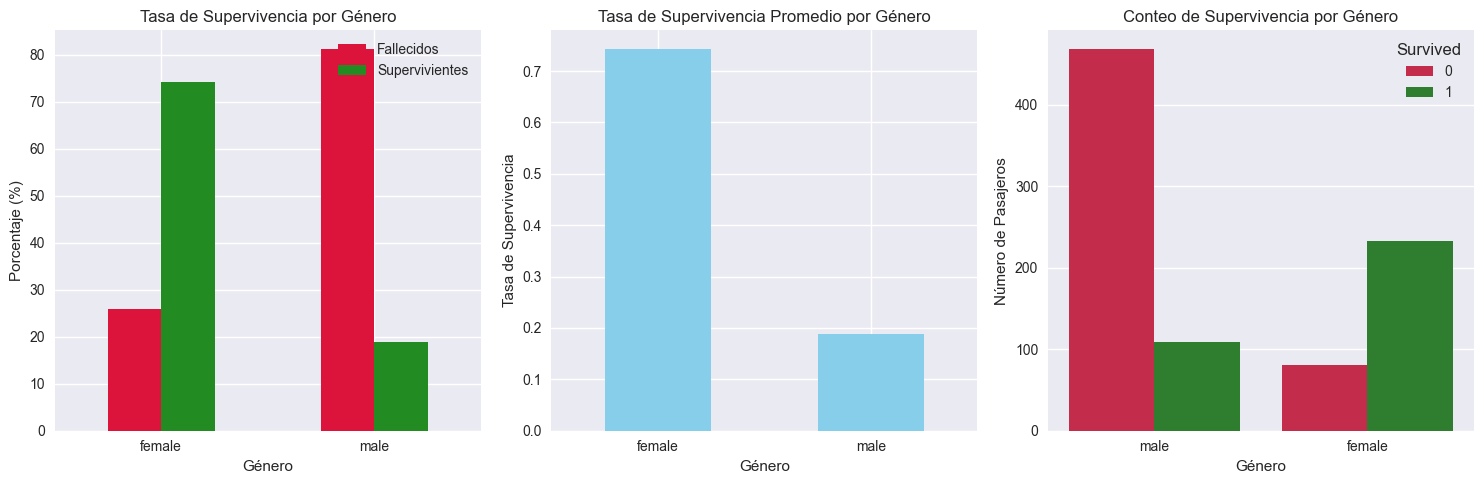

In [19]:
print("\n👫 SUPERVIVENCIA POR GÉNERO")
print("=" * 25)

gender_survival = pd.crosstab(df["Sex"], df["Survived"], margins=True)
gender_survival_pct = pd.crosstab(df["Sex"], df["Survived"], normalize="index") * 100

print("Tabla de contingencia:")
print(gender_survival)
print("\nPorcentajes por género:")
print(gender_survival_pct.round(1))

# Visualización
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
gender_survival_pct.plot(kind="bar", ax=plt.gca(), color=["crimson", "forestgreen"])
plt.title("Tasa de Supervivencia por Género")
plt.xlabel("Género")
plt.ylabel("Porcentaje (%)")
plt.legend(["Fallecidos", "Supervivientes"])
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color="skyblue")
plt.title("Tasa de Supervivencia Promedio por Género")
plt.xlabel("Género")
plt.ylabel("Tasa de Supervivencia")
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Sex", hue="Survived", palette=["crimson", "forestgreen"])
plt.title("Conteo de Supervivencia por Género")
plt.xlabel("Género")
plt.ylabel("Número de Pasajeros")

plt.tight_layout()
save_current_plot("6_1-Características Demográficas", "../results/figures/eda_plots")
plt.show()

### 6.2 Supervivencia por Clase


🎫 SUPERVIVENCIA POR CLASE
Tabla de contingencia:
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Porcentajes por clase:
Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2
✅ Gráfico guardado: ../results/figures/eda_plots\6_2-Supervivencia por Clase.png


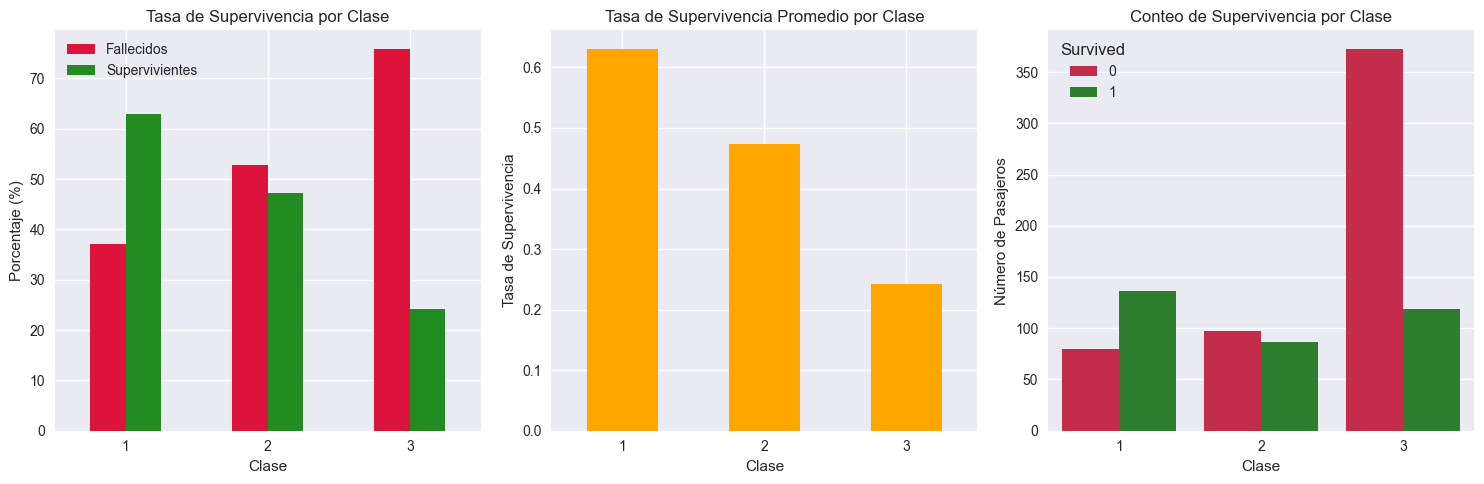

In [20]:
print("\n🎫 SUPERVIVENCIA POR CLASE")
print("=" * 25)

class_survival = pd.crosstab(df["Pclass"], df["Survived"], margins=True)
class_survival_pct = pd.crosstab(df["Pclass"], df["Survived"], normalize="index") * 100

print("Tabla de contingencia:")
print(class_survival)
print("\nPorcentajes por clase:")
print(class_survival_pct.round(1))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
class_survival_pct.plot(kind="bar", ax=plt.gca(), color=["crimson", "forestgreen"])
plt.title("Tasa de Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Porcentaje (%)")
plt.legend(["Fallecidos", "Supervivientes"])
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df.groupby("Pclass")["Survived"].mean().plot(kind="bar", color="orange")
plt.title("Tasa de Supervivencia Promedio por Clase")
plt.xlabel("Clase")
plt.ylabel("Tasa de Supervivencia")
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Pclass", hue="Survived", palette=["crimson", "forestgreen"])
plt.title("Conteo de Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Número de Pasajeros")

plt.tight_layout()
save_current_plot("6_2-Supervivencia por Clase","../results/figures/eda_plots")
plt.show()

### 6.3 Supervivencia por Puerto de Embarque


⚓ SUPERVIVENCIA POR PUERTO DE EMBARQUE
Tabla de contingencia:
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889

Porcentajes por puerto:
Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.3  33.7
✅ Gráfico guardado: ../results/figures/eda_plots\6_3-Puerto de Embarque.png


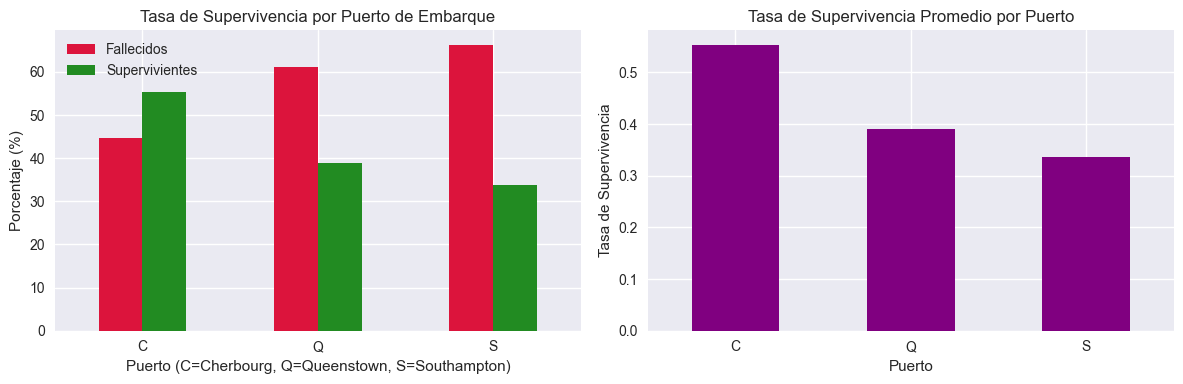

In [21]:
print("\n⚓ SUPERVIVENCIA POR PUERTO DE EMBARQUE")
print("=" * 35)

# Eliminar valores nulos para este análisis
df_embarked_clean = df.dropna(subset=["Embarked"])

embarked_survival = pd.crosstab(
    df_embarked_clean["Embarked"], df_embarked_clean["Survived"], margins=True
)
embarked_survival_pct = (
    pd.crosstab(
        df_embarked_clean["Embarked"], df_embarked_clean["Survived"], normalize="index"
    )
    * 100
)

print("Tabla de contingencia:")
print(embarked_survival)
print("\nPorcentajes por puerto:")
print(embarked_survival_pct.round(1))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
embarked_survival_pct.plot(kind="bar", ax=plt.gca(), color=["crimson", "forestgreen"])
plt.title("Tasa de Supervivencia por Puerto de Embarque")
plt.xlabel("Puerto (C=Cherbourg, Q=Queenstown, S=Southampton)")
plt.ylabel("Porcentaje (%)")
plt.legend(["Fallecidos", "Supervivientes"])
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df_embarked_clean.groupby("Embarked")["Survived"].mean().plot(
    kind="bar", color="purple"
)
plt.title("Tasa de Supervivencia Promedio por Puerto")
plt.xlabel("Puerto")
plt.ylabel("Tasa de Supervivencia")
plt.xticks(rotation=0)

plt.tight_layout()
save_current_plot("6_3-Puerto de Embarque","../results/figures/eda_plots")
plt.show()

## 7. Análisis de Variables Numéricas

### 7.1 Distribución de Edad


👶👴 ANÁLISIS DE EDAD
Edad promedio: 29.7 años
Edad mediana: 28.0 años
Edad mínima: 0.4 años
Edad máxima: 80.0 años
Desviación estándar: 14.5 años
✅ Gráfico guardado: ../results/figures/eda_plots\7_1-Distribución de Edad.png


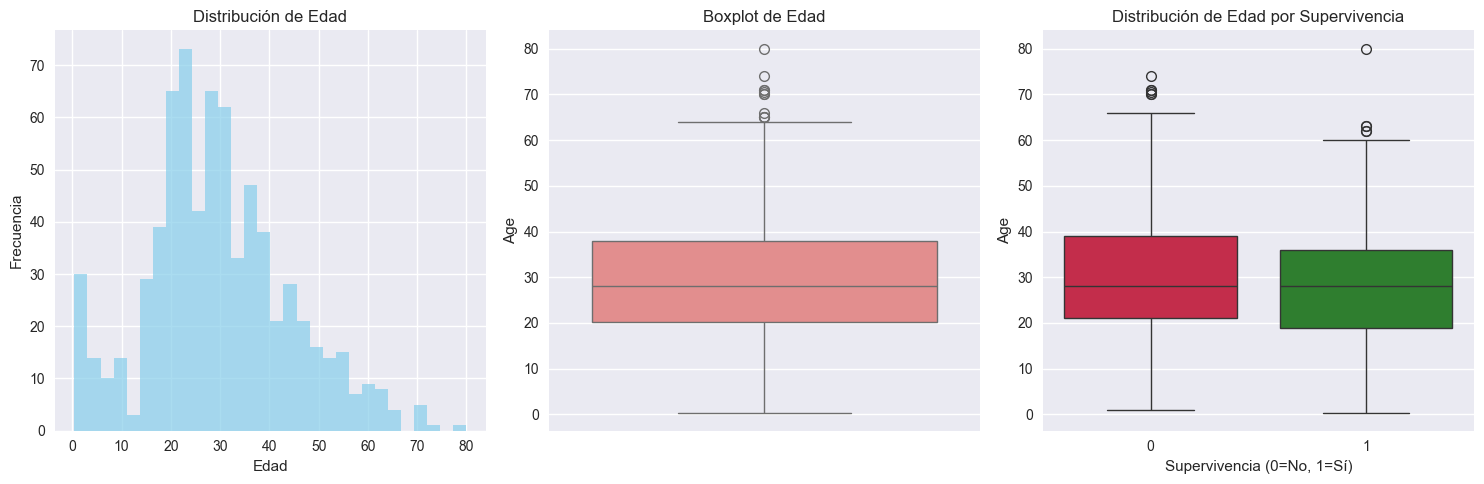

In [23]:
print("\n👶👴 ANÁLISIS DE EDAD")
print("=" * 20)

print(f"Edad promedio: {df['Age'].mean():.1f} años")
print(f"Edad mediana: {df['Age'].median():.1f} años")
print(f"Edad mínima: {df['Age'].min():.1f} años")
print(f"Edad máxima: {df['Age'].max():.1f} años")
print(f"Desviación estándar: {df['Age'].std():.1f} años")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df["Age"].hist(bins=30, color="skyblue", alpha=0.7)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y="Age", color="lightcoral")
plt.title("Boxplot de Edad")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Survived", y="Age", palette=["crimson", "forestgreen"])
plt.title("Distribución de Edad por Supervivencia")
plt.xlabel("Supervivencia (0=No, 1=Sí)")

plt.tight_layout()
save_current_plot("7_1-Distribución de Edad", "../results/figures/eda_plots")
plt.show()

### 7.2 Distribución de Tarifa


💰 ANÁLISIS DE TARIFA
Tarifa promedio: $32.20
Tarifa mediana: $14.45
Tarifa mínima: $0.00
Tarifa máxima: $512.33
✅ Gráfico guardado: ../results/figures/eda_plots\7_2-Distribución de Tarifa.png


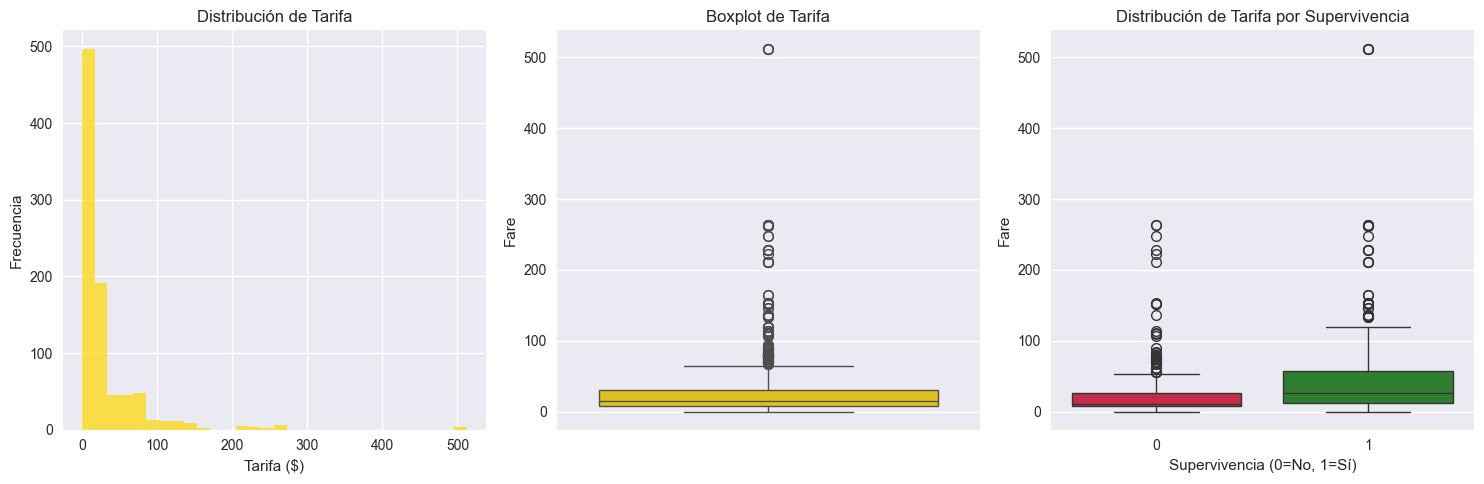

In [24]:
print("\n💰 ANÁLISIS DE TARIFA")
print("=" * 20)

print(f"Tarifa promedio: ${df['Fare'].mean():.2f}")
print(f"Tarifa mediana: ${df['Fare'].median():.2f}")
print(f"Tarifa mínima: ${df['Fare'].min():.2f}")
print(f"Tarifa máxima: ${df['Fare'].max():.2f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df["Fare"].hist(bins=30, color="gold", alpha=0.7)
plt.title("Distribución de Tarifa")
plt.xlabel("Tarifa ($)")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y="Fare", color="gold")
plt.title("Boxplot de Tarifa")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Survived", y="Fare", palette=["crimson", "forestgreen"])
plt.title("Distribución de Tarifa por Supervivencia")
plt.xlabel("Supervivencia (0=No, 1=Sí)")

plt.tight_layout()
save_current_plot("7_2-Distribución de Tarifa", "../results/figures/eda_plots")
plt.show()

## 8. Análisis de Correlaciones


🔗 MATRIZ DE CORRELACIÓN
✅ Gráfico guardado: ../results/figures/eda_plots\8-Correlaciones.png


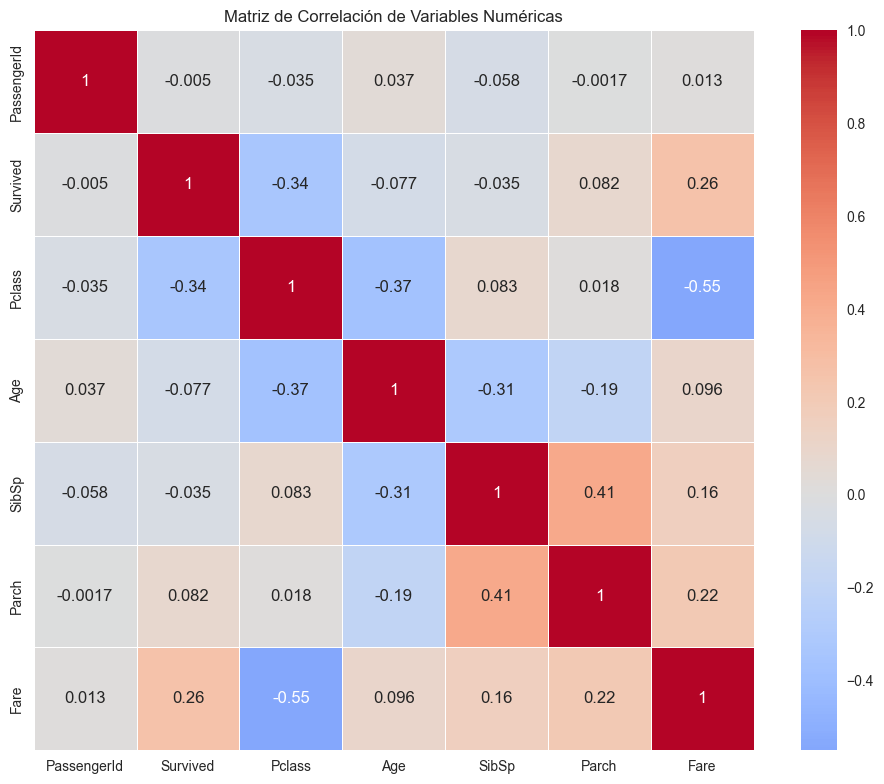

Correlaciones con Supervivencia:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [25]:
print("\n🔗 MATRIZ DE CORRELACIÓN")
print("=" * 25)

# Seleccionar solo variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.tight_layout()
save_current_plot("8-Correlaciones", "../results/figures/eda_plots")
plt.show()

# Correlaciones con la variable objetivo
print("Correlaciones con Supervivencia:")
survival_corr = correlation_matrix["Survived"].sort_values(ascending=False)
print(survival_corr)

## 9. Análisis Combinado: Género, Clase y Supervivencia


👥🎫 ANÁLISIS COMBINADO: GÉNERO Y CLASE
               Total  Supervivientes  Tasa_Supervivencia
Sex    Pclass                                           
female 1          94              91               0.968
       2          76              70               0.921
       3         144              72               0.500
male   1         122              45               0.369
       2         108              17               0.157
       3         347              47               0.135
✅ Gráfico guardado: ../results/figures/eda_plots\9-Análisis Combinado.png


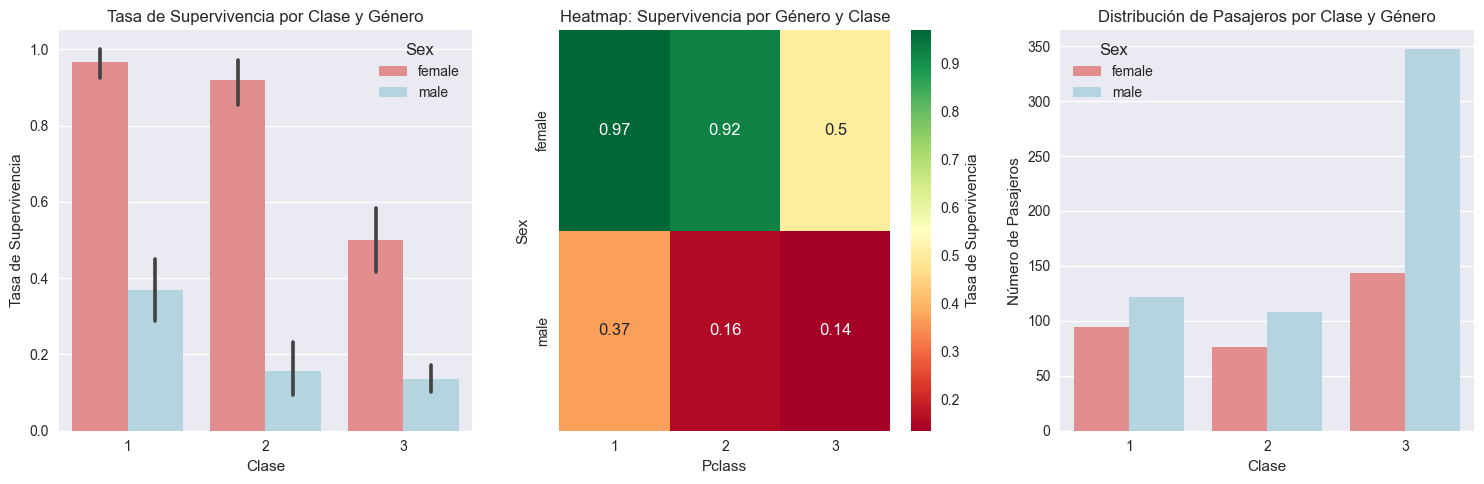

In [26]:
print("\n👥🎫 ANÁLISIS COMBINADO: GÉNERO Y CLASE")
print("=" * 40)

# Crear tabla cruzada
combined_analysis = (
    df.groupby(["Sex", "Pclass"])["Survived"].agg(["count", "sum", "mean"]).round(3)
)
combined_analysis.columns = ["Total", "Supervivientes", "Tasa_Supervivencia"]
print(combined_analysis)

# Visualización
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(
    data=df, x="Pclass", y="Survived", hue="Sex", palette=["lightcoral", "lightblue"]
)
plt.title("Tasa de Supervivencia por Clase y Género")
plt.xlabel("Clase")
plt.ylabel("Tasa de Supervivencia")

plt.subplot(1, 3, 2)
pivot_table = df.pivot_table(
    values="Survived", index="Sex", columns="Pclass", aggfunc="mean"
)
sns.heatmap(
    pivot_table, annot=True, cmap="RdYlGn", cbar_kws={"label": "Tasa de Supervivencia"}
)
plt.title("Heatmap: Supervivencia por Género y Clase")

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Pclass", hue="Sex", palette=["lightcoral", "lightblue"])
plt.title("Distribución de Pasajeros por Clase y Género")
plt.xlabel("Clase")
plt.ylabel("Número de Pasajeros")

plt.tight_layout()
save_current_plot("9-Análisis Combinado", "../results/figures/eda_plots")
plt.show()